#Spatial Filtering

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

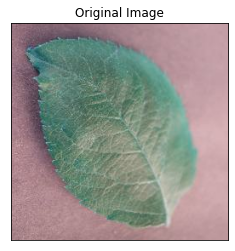

In [11]:
ref = cv2.imread('/content/1b36926c-faee-4b6c-9f66-26d1377b9a78___RS_HL 7662.JPG')
plt.imshow(ref), plt.grid(False)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])
plt.show()

#1. Averaging Filter
Shown below is how to define a very simple averaging kernel and apply it on your images

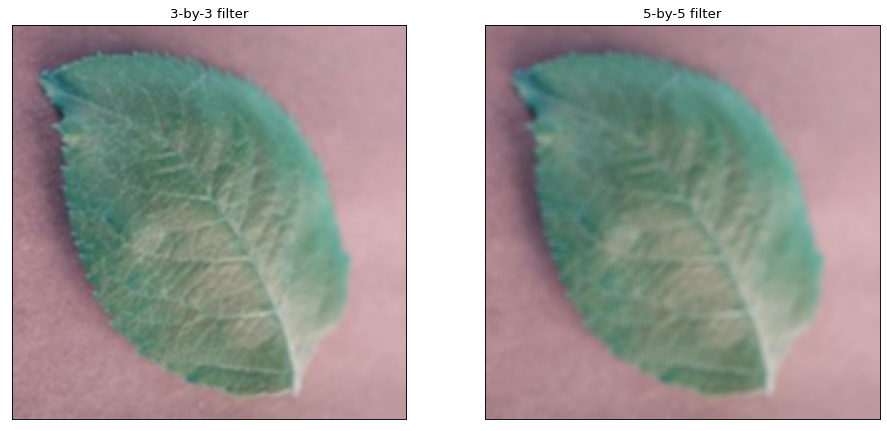

In [12]:
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

**cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])**

**src** – input image.

**ddepth** – desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:

**src.depth()** = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

**src.depth()** = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

**src.depth()** = CV_32F, ddepth = -1/CV_32F/CV_64F

**src.depth()** = CV_64F, ddepth = -1/CV_64F

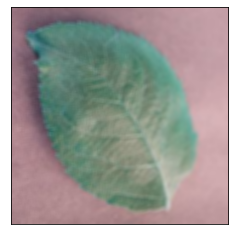

(<matplotlib.image.AxesImage at 0x7fa589d02590>,
 None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [13]:
blurred = cv2.blur(ref, (5, 5), -1)
plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

#2. Padding
**BORDER_REPLICATE**: aaaaaa|abcdefgh|hhhhhhh

**BORDER_REFLECT**: fedcba|abcdefgh|hgfedcb

**BORDER_REFLECT_101**: gfedcb|abcdefgh|gfedcba

**BORDER_WRAP**: cdefgh|abcdefgh|abcdefg

**BORDER_CONSTANT**: iiiiii|abcdefgh|iiiiiii with some specified 'i

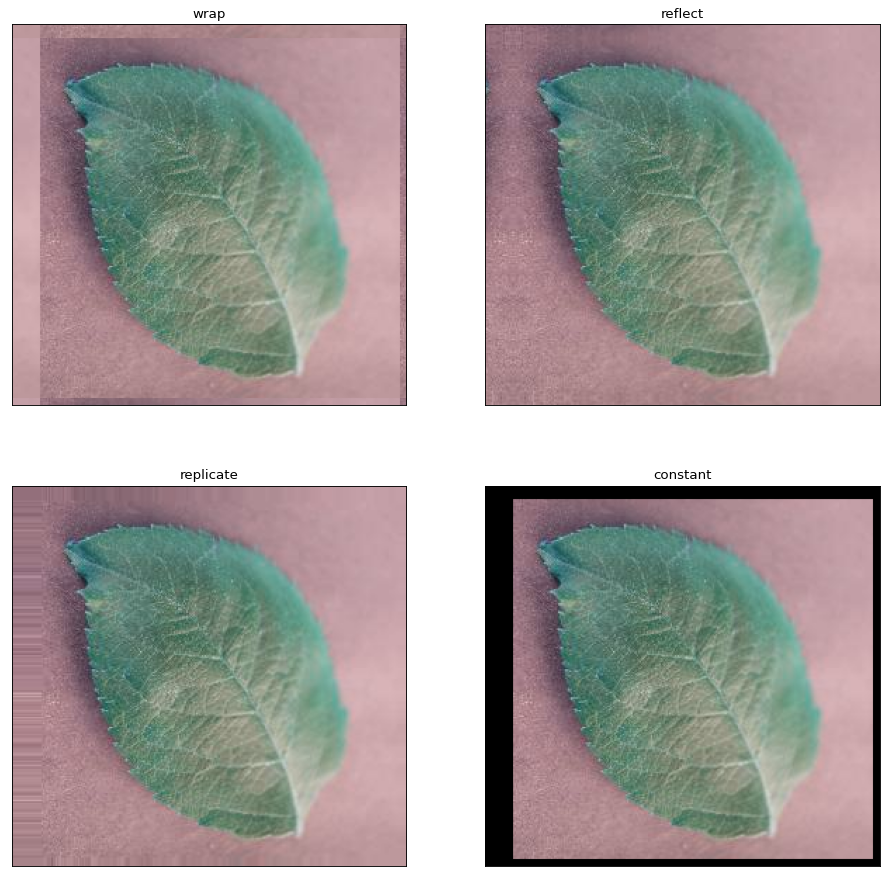

In [14]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_CONSTANT, const)
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')
plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')
plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')
plt.show()

#3. User-defined kernels

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

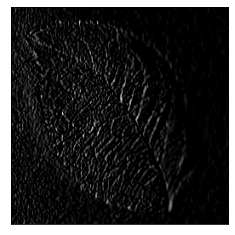

In [15]:
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

#4. Median filtering

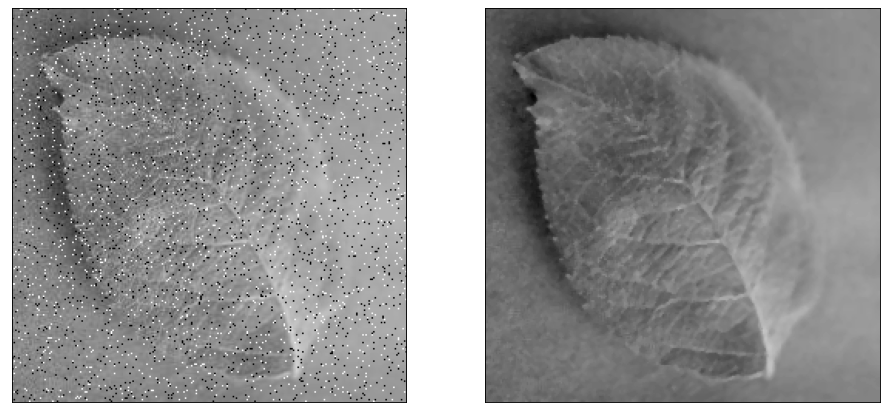

In [16]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])
salt = s_and_p > .975
pepper = s_and_p < .025
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]
Med = cv2.medianBlur(noisy, 3)
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

#5. Gaussian filtering
using **cv2.GaussianBlur()** function, and, **using cv2.sepFilter2D()** after creating two separate horizontal and vertical kernels and applying them.

But, first of all, we need to have a noisy image; specifically with gaussian noise added to it. To create such an image we use Numpy to create random gaussian noise and then add it to the image

(<matplotlib.image.AxesImage at 0x7fa589d9c750>, None)

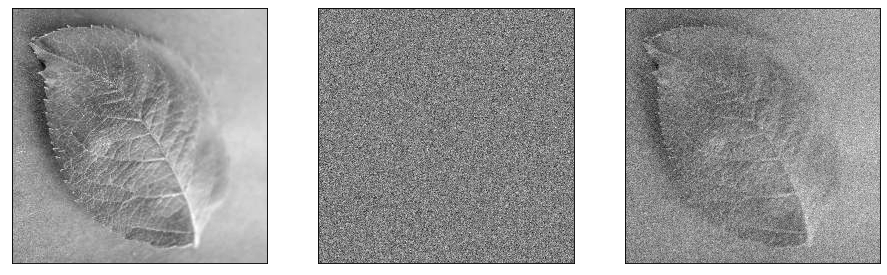

In [17]:
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
g_noisy = gray + gauss_noise # Gaussian noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

**cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])**

**src** – input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.

**ksize** – Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero’s and then they are computed from sigma*.

**sigmaX** – Gaussian kernel standard deviation in X direction.

**sigmaY** – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height , respectively (see getGaussianKernel() for details); to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.

**borderType** – pixel extrapolation method.

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

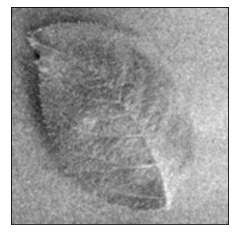

In [18]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

**cv2.getGaussianKernel(ksize, sigma[, ktype])**

**ksize** – Aperture size. It should be odd and positive.

**sigma**– Gaussian standard deviation. If it is non-positive, it is computed from ksize as sigma = 0.3((ksize-1)0.5 - 1) + 0.8.

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x7fa58a157d10>, None)

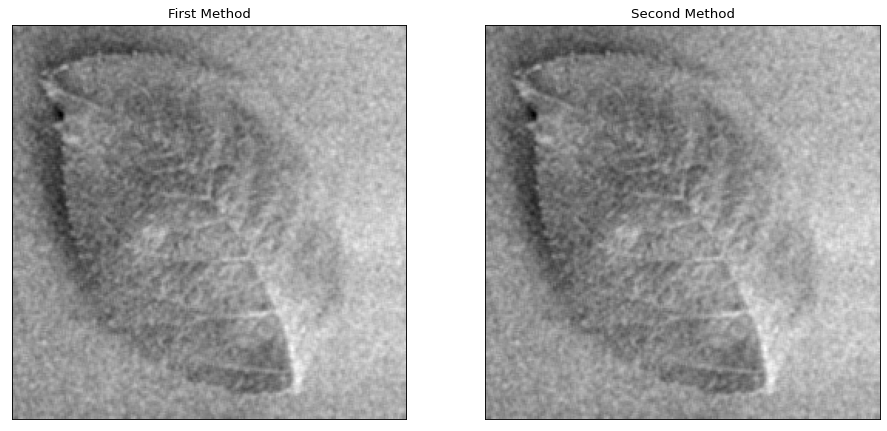

In [19]:
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('First Method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('Second Method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)